<a href="https://colab.research.google.com/github/karind7/Data_Integrated_Project_1-video_games/blob/main/Data_Integrated_Project_1_video_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project description**

we work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. we need to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.

# **Step 1: studying the general information**


**The Dataset**

The data set we'll be using is a games sale set.
The data is straightforward. Each row represents a game sales. Each column contains the games attributes such as Name,	Platform,	Year of Release,	Genre	NA_sales,	EU_sales,	JP_sales,	Other_sales,	Critic Score,	User Score and 	Rating

in this project we will research what affects the sales of the games in general and in specific regions.

In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math

In [ ]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
except:
  pass

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
try:
  data = pd.read_csv("/content/drive/MyDrive/data science/games.csv", error_bad_lines=False)
except:
  data = pd.read_csv("/datasets/games.csv")

b'Skipping line 950: expected 11 fields, saw 12\nSkipping line 1091: expected 11 fields, saw 12\nSkipping line 1633: expected 11 fields, saw 12\nSkipping line 1839: expected 11 fields, saw 14\nSkipping line 2888: expected 11 fields, saw 12\nSkipping line 2945: expected 11 fields, saw 13\nSkipping line 3026: expected 11 fields, saw 12\nSkipping line 3105: expected 11 fields, saw 14\nSkipping line 3218: expected 11 fields, saw 13\nSkipping line 3355: expected 11 fields, saw 14\nSkipping line 3447: expected 11 fields, saw 13\nSkipping line 3512: expected 11 fields, saw 14\nSkipping line 3567: expected 11 fields, saw 12\nSkipping line 3568: expected 11 fields, saw 12\nSkipping line 3745: expected 11 fields, saw 12\nSkipping line 3905: expected 11 fields, saw 13\nSkipping line 3976: expected 11 fields, saw 13\nSkipping line 4059: expected 11 fields, saw 13\nSkipping line 4108: expected 11 fields, saw 13\nSkipping line 4181: expected 11 fields, saw 12\nSkipping line 4377: expected 11 fields,

In [ ]:
try:
    initial_row_count = 0
    with open('/content/drive/MyDrive/data science/games.csv', 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            initial_row_count += 1
    initial_row_count
    rows_lost = ((initial_row_count - data.shape[0])/ initial_row_count )
    print("percentage of rows that dropped due to error is {:.2%}". format(rows_lost))
    
except:
    initial_row_count = 0
    with open('/datasets/games.csv', 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            initial_row_count += 1
    initial_row_count
    rows_lost = ((initial_row_count - data.shape[0])/ initial_row_count )
    print("percentage of rows that dropped due to error is {:.2%}". format(rows_lost))

percentage of rows that dropped due to error is 0.66%


in the data provided there were some corporate rowse, the percentage of the corporate rowse was low (0.66%) so we can provide without warring that the data is scued

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16606 entries, 0 to 16605
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16604 non-null  object 
 1   Platform         16606 non-null  object 
 2   Year_of_Release  16339 non-null  float64
 3   Genre            16604 non-null  object 
 4   NA_sales         16606 non-null  float64
 5   EU_sales         16606 non-null  float64
 6   JP_sales         16606 non-null  float64
 7   Other_sales      16606 non-null  float64
 8   Critic_Score     8110 non-null   float64
 9   User_Score       9981 non-null   object 
 10  Rating;          16584 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


from this table we can see that user score is an object so we will need to cast it in float, in addition we have missing values in Critic Score and User Score

In [ ]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16339.000000,16606.000000,16606.000000,16606.000000,16606.000000,8110.000000
mean,2006.480507,0.264251,0.145618,0.077838,0.047516,68.979531
std,5.887906,0.816090,0.504847,0.309668,0.187309,13.942895
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


in first glance the data description looks fine

In [ ]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating;
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E;
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,;
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E;
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E;
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,;
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,;
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E;
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E;
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E;
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,;


view of the table for better understanding of the data we are working with

**conclusion**:
1. some rows were removed do to iscrepancy but only 0.66%
2. "name", "platform" columes will needed to be changed to lowercase
3. make column names lowercase
4. check for doplicatse
5. turn user_score to float and change critic score to the same scale


# **Step 2: Preparing the data**

In [ ]:
#lowercase colums
data.columns= data.columns.str.lower()

In [ ]:
##lowercase needed colums
for i in["name", "platform", "genre"]:
  data[i] = data[i].str.lower()

In [ ]:
#checking for duplicates
data[data.duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating;


In [ ]:
#filling the unknown years to zero, as it is an immposibale value to have otherwise, casting the colum to int
data["year_of_release"] = data["year_of_release"].fillna(0)
data["year_of_release"] = data["year_of_release"].astype(int)

In [ ]:
# data.plot(x = "platform", y = "user_score", kind = "bar")

In [ ]:
#checking if user score as zero values in a possible value
data.loc[data["user_score"] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating;


In [ ]:
#filling the unknown user score with zero for the same reason as above, replacing the tbd value with zero and casting to float 
data["user_score"] = data["user_score"].fillna(0)
#tbh is data that is missing because there is still no rating to the game
data["user_score"] = data["user_score"].replace(to_replace = 'tbd', value=0)
data["user_score"] = pd.to_numeric(data["user_score"] , errors='ignore')

In [ ]:
#cheacking if critic_score as zero values in a possibal value
data.loc[data["critic_score"] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating;


In [ ]:
#filling the unknown critic score to zero, for the same reason as above, casting the colum to float, and deviding it by 10 to make in the same scale as user score
data["critic_score"] = data["critic_score"].fillna(0)
data["critic_score"] = pd.to_numeric(data["critic_score"] , errors='ignore')
data["critic_score"] = data["critic_score"]/10

In [ ]:
#creating a cloum of total sales wich is the sum of sale from all regions
all_regions = ["na_sales", "eu_sales", "jp_sales",	"other_sales"	]
data["total_sales"] = data[all_regions].sum(axis=1)

In [ ]:
#checking data for duplicates, found none
data[data.duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating;,total_sales


**conclusion:**

changed the types of the data for further analysis

fill the missing data with the value of zero

created a new colum of total sales

# **Step 3: Analyzing the data**

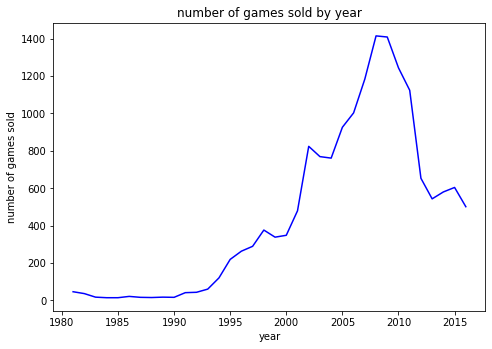

In [ ]:
games_released_by_year = data.query('year_of_release > 1980').groupby("year_of_release").count().reset_index()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
name = games_released_by_year["name"]
release_year = games_released_by_year["year_of_release"]

ax.plot(release_year, name, color = 'b')

ax.set_ylabel('number of games sold')
ax.set_xlabel('year')
ax.set_title('number of games sold by year')
plt.show()

in this graph we can see the frequency of game realsed in every year

we can see a rise in game sold from 1993 with a pick at 2008 and decline after that to 2016.

the increase of games salse was do to technological advances with made platforms and games cheaper so more people could afford them and the decrease is probably becouse peple buy more digital copies of games instead of physical

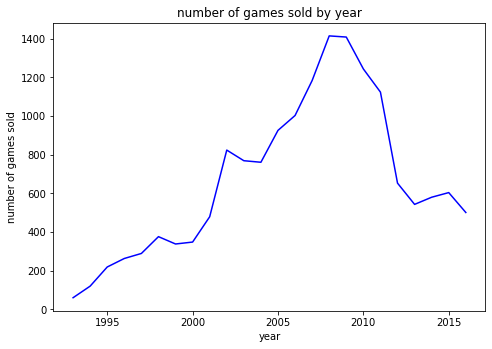

In [ ]:
# lets look at the relevant years only by discarding the outliers
Q1 = data["year_of_release"].quantile(0.25)
Q3 = data["year_of_release"].quantile(0.75)
IQR = Q3 - Q1

data = data.query('(@Q1 - 1.5 * @IQR) <= year_of_release <= (@Q3 + 1.5 * @IQR)')

games_released_by_year = data.query('(@Q1 - 1.5 * @IQR) <= year_of_release <= (@Q3 + 1.5 * @IQR)').groupby("year_of_release").count().reset_index()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
name = games_released_by_year["name"]
release_year = games_released_by_year["year_of_release"]

ax.plot(release_year, name, color = 'b')

ax.set_ylabel('number of games sold')
ax.set_xlabel('year')
ax.set_title('number of games sold by year')
plt.show()

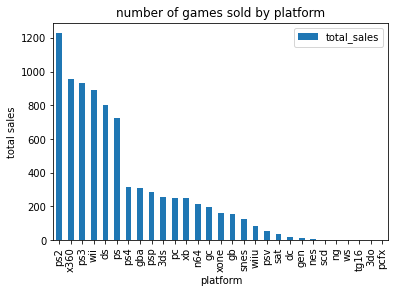

In [ ]:
sales_by_platform = data.groupby("platform")["total_sales"].sum().sort_values(ascending=False).reset_index()
sales_by_platform.plot(x = "platform", y = "total_sales", kind = "bar")
plt.ylabel("total sales")
plt.title('number of games sold by platform')
plt.show()

in this graph we can see the frequency of game realsed for every platform

we can see that the most popular platforms by far are ps2, xbox30, ps3, wii, ds, ps. Althoe we don't know when those games were realesd and if the platforms are still popular 

In [ ]:
#creating al list of the most popular platforms
high_platforms_sales = sales_by_platform[:6]["platform"].tolist()

In [ ]:
high_platforms_sales_status = []
for i in high_platforms_sales:
    high_platforms_sales_status.append(pd.pivot_table(data, index = ["platform"], columns = "year_of_release", values = "total_sales", aggfunc = "sum", margins = True).reset_index())

In [ ]:
high_platforms_sales_status = []
for i in high_platforms_sales:
    high_platforms_sales_status.append(data.query('platform == @i').groupby("year_of_release").sum().reset_index())

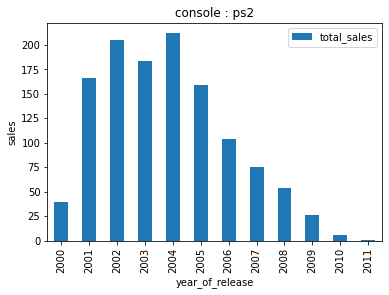

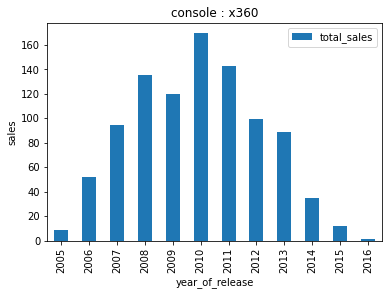

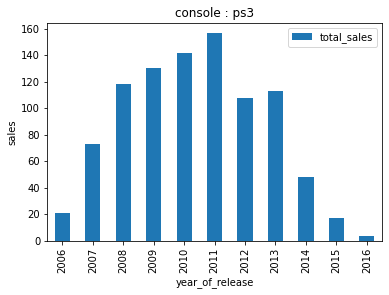

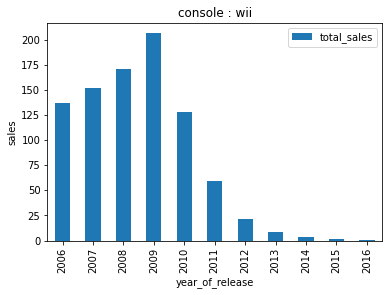

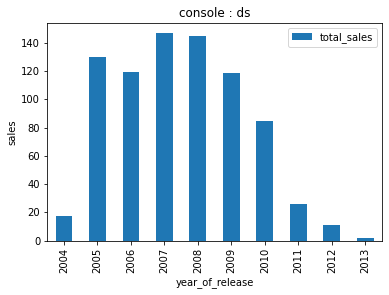

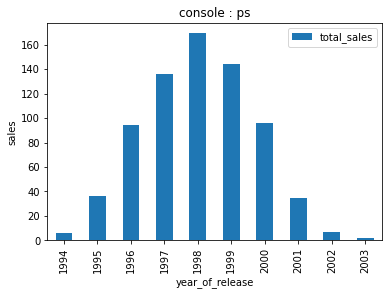

In [ ]:
for i in range(len(high_platforms_sales_status)):
    high_platforms_sales_status[i].plot(x = "year_of_release", y = "total_sales", kind = "bar")
    plt.title("console : {}".format(high_platforms_sales[i]))
    plt.ylabel('sales')
    plt.show()

ps used to be popular but he can see it didn't have sales after 2003 ans ps2 also didnt have sales after 2011
in those graphs we can see the first years the games for the platforms were sold:
1. ps2: 2000
2. x360: 2005
3. ps3: 2006
4. wii: 2006 
5. ds: 2004
6. ps: 1994

so we can see the news platforms from this graph


In [ ]:
#for the each popular platforms we calculated the range within one standard deviation and average the results to get the avrage years wich the platform was "active"
high_platforms_sales = ["ps2", "x360", "ps3", "wii", "ds"]
diff = 0
for i in high_platforms_sales :
    min_year = data.query("platform == @i")["year_of_release"].min()
    max_year = data.query("platform == @i")["year_of_release"].max()
    diff += max_year - min_year
print("it generally take for new platforms to appear and fade is {} years".format(diff/len(high_platforms_sales)))

it generally take for new platforms to appear and fade is 10.2 years


for every popular platform we took the max year and subtract the min year a game was sold(with the relevant years already) then we added all the differences and divided them by the number of platforms to get the average difference

we shuld look at platforms that started sales in the last 3 years, The reason why to chose data since 2014 is the following. We see that the leader in sales for the entire history of the PS2. But sales by 2011 are already zero. The X360 was at its peak in 2010, but by 2016 it had fallen to almost 0. In general, a sharp decline in the platform can occur in just 3 years. Let's look at this sales horizon.

In [ ]:
relevant_data = data.query("year_of_release >= 2014")


In [ ]:
relevant_platforms = relevant_data["platform"].unique()

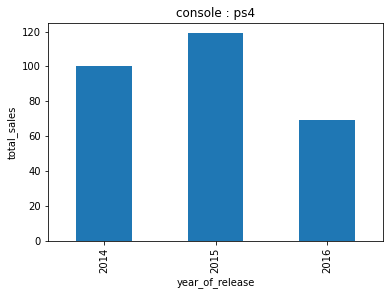

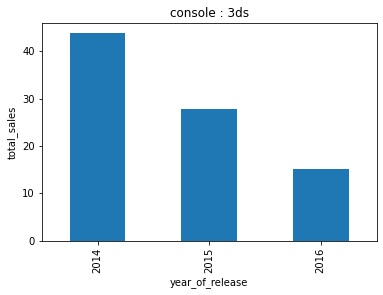

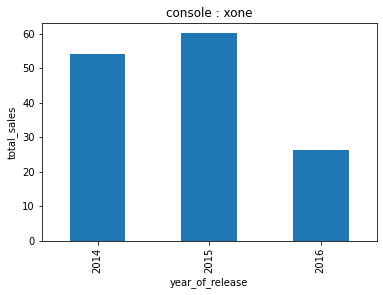

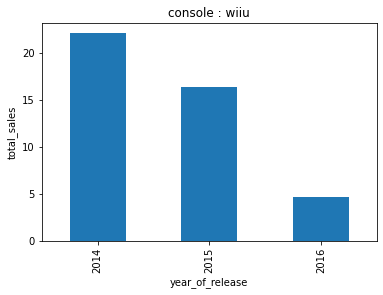

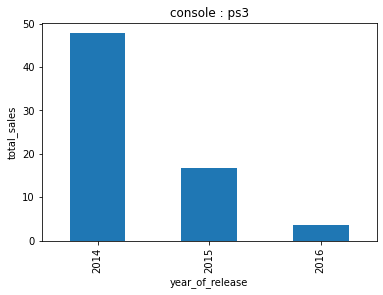

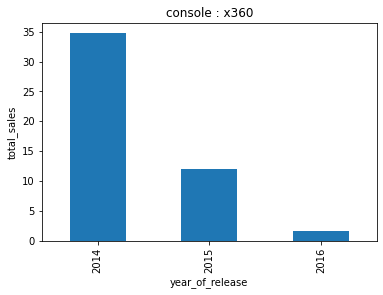

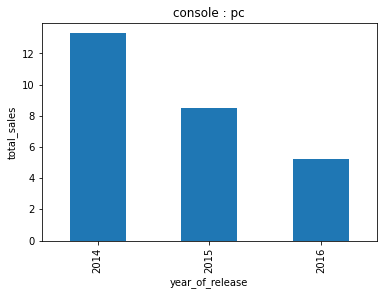

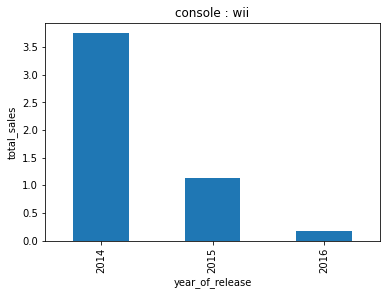

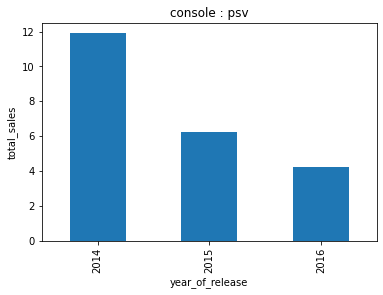

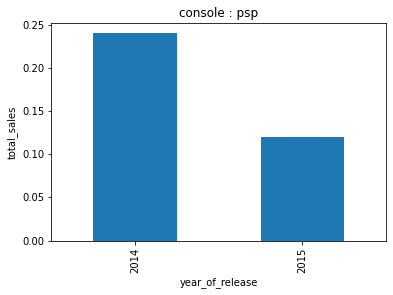

In [ ]:
for i in relevant_platforms:
    relevant_platforms_sales_status = relevant_data.query('platform == @i').groupby("year_of_release").sum()["total_sales"]
    relevant_platforms_sales_status.plot(x = "year_of_release", y = "total_sales", kind = "bar")
    plt.title("console : {}".format(i))
    plt.ylabel('total_sales')
    plt.show()

after looking at the graphs i don't see any profitable platforms they are all in decline,but let's see how outliers affect our data

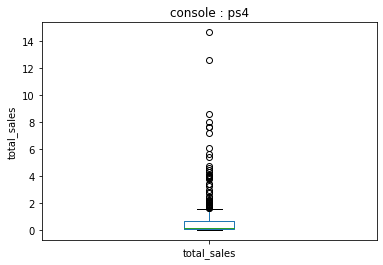

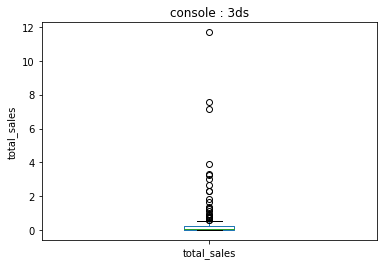

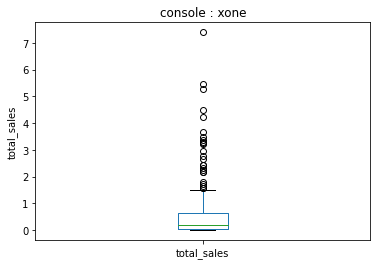

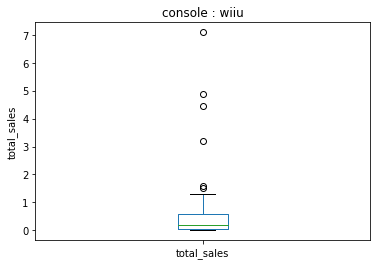

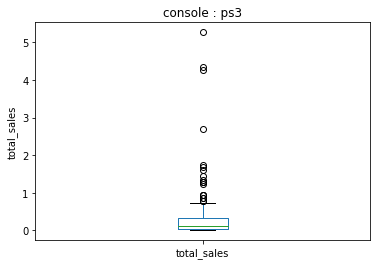

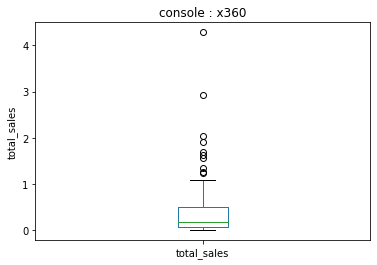

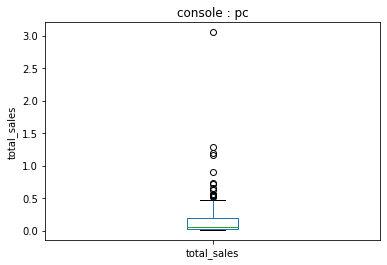

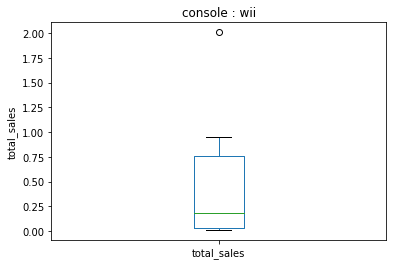

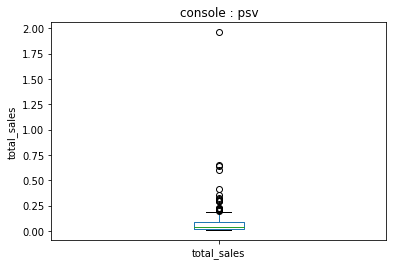

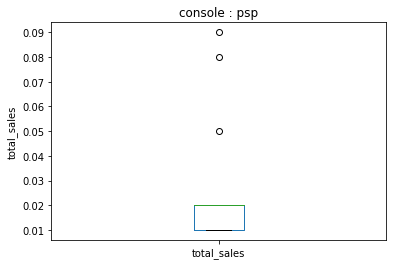

In [ ]:
for i in relevant_data["platform"].unique():
    relevant_data.query("platform == @i")["total_sales"].plot.box()
    plt.title("console : {}".format(i))
    plt.ylabel('total_sales')
    plt.show()


in the plot box we can see that in all platforms we have quite the number of outliers, in game sales having outliers is not strange as the market is very affected by what's popular but lets look at the sales without them

In [ ]:
for i in relevant_data["platform"].unique():
    Q1 = relevant_data.query('platform == @i')["total_sales"].quantile(0.25)
    Q3 = relevant_data.query('platform == @i')['total_sales'].quantile(0.75)
    IQR = Q3 - Q1

filtered_relevant_data = relevant_data.query('(@Q1 - 1.5 * @IQR) <= total_sales <= (@Q3 + 1.5 * @IQR)')
filtered_relevant_data.describe()["total_sales"]

count    457.000000
mean       0.019234
std        0.007952
min        0.010000
25%        0.010000
50%        0.020000
75%        0.030000
max        0.030000
Name: total_sales, dtype: float64

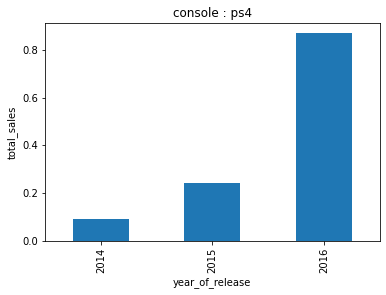

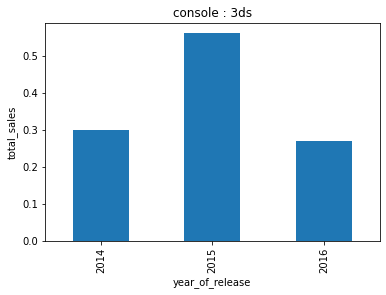

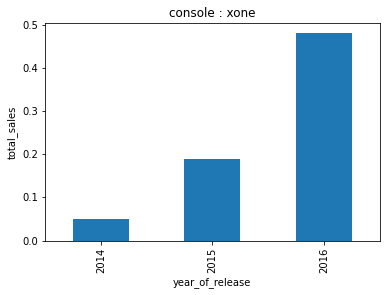

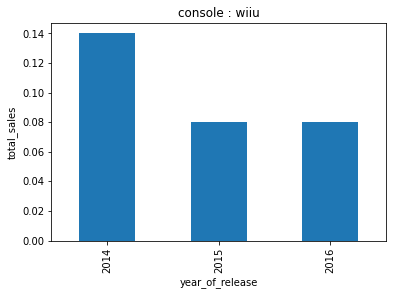

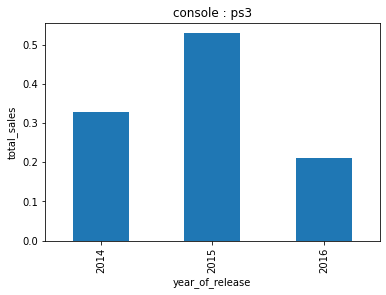

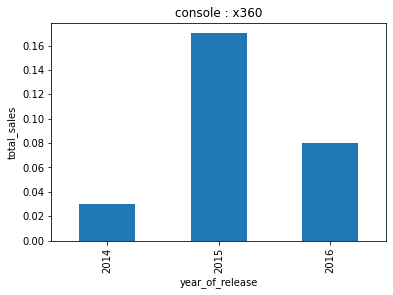

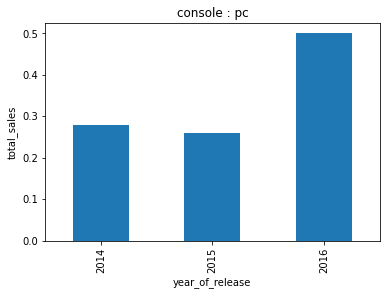

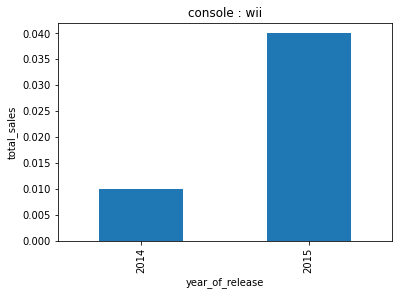

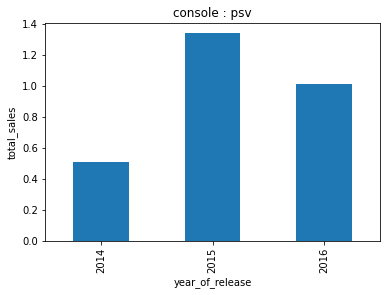

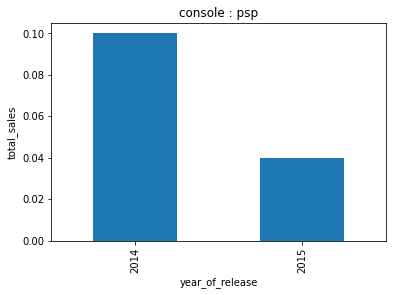

In [ ]:
for i in relevant_platforms:
    relevant_platforms_sales_status = filtered_relevant_data.query('platform == @i').groupby("year_of_release").sum()["total_sales"]
    relevant_platforms_sales_status.plot(x = "year_of_release", y = "total_sales", kind = "bar")
    plt.title("console : {}".format(i))
    plt.ylabel('total_sales')
    
    plt.show()

now when we look at the dataw ithout outliers we can see that good platforms to invest in are ps4, xone and pc by the fact that we can see the rise in total sales in those platforms

In [ ]:
for i in relevant_data["platform"].unique():
  des = relevant_data.query("platform == @i").describe()["total_sales"]
  print("For the platform {} there were {} games sold and the avrege sale is {:.2}".format(i, des["count"], des["mean"]))

For the platform ps4 there were 376.0 games sold and the avrege sale is 0.77
For the platform 3ds there were 211.0 games sold and the avrege sale is 0.41
For the platform xone there were 228.0 games sold and the avrege sale is 0.62
For the platform wiiu there were 73.0 games sold and the avrege sale is 0.59
For the platform ps3 there were 218.0 games sold and the avrege sale is 0.31
For the platform x360 there were 111.0 games sold and the avrege sale is 0.43
For the platform pc there were 151.0 games sold and the avrege sale is 0.18
For the platform wii there were 11.0 games sold and the avrege sale is 0.46
For the platform psv there were 293.0 games sold and the avrege sale is 0.076
For the platform psp there were 13.0 games sold and the avrege sale is 0.028


we can see that we don't have many sales in ds and wii so the information by those platforms is not very reliable
by average the most sold games are for the platform of x360 and ps4(they are latest model of the platforms)
psv platform has alot of games sold but low sales so the games for this platform are probbly cheap and so is psp 




In [ ]:
popular_platform_des = relevant_data.query("platform == 'ps4' and critic_score > 0 and user_score > 0")
popular_platform_des.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,2015.188034,0.319615,0.434573,0.036282,0.146282,7.220940,6.832479,0.936752
std,0.774393,0.566328,0.897390,0.064624,0.260218,1.228187,1.392520,1.659319
min,2014.000000,0.000000,0.000000,0.000000,0.000000,1.900000,1.500000,0.010000
25%,2015.000000,0.020000,0.020000,0.000000,0.010000,6.600000,6.200000,0.070000
50%,2015.000000,0.080000,0.110000,0.010000,0.040000,7.300000,7.100000,0.260000
75%,2016.000000,0.357500,0.410000,0.050000,0.150000,8.000000,7.900000,0.930000
max,2016.000000,3.960000,6.310000,0.490000,1.970000,9.700000,9.200000,12.620000


In [ ]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [ ]:
popular_platform_data = relevant_data.query("platform == 'ps4'")
popular_platform_data["user_score"] = popular_platform_data["user_score"].replace(to_replace = 0, value=round(popular_platform_des["user_score"].mean(),1))
popular_platform_data["critic_score"] = popular_platform_data["critic_score"].replace(to_replace = 0, value=round(popular_platform_des["critic_score"].mean(),1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


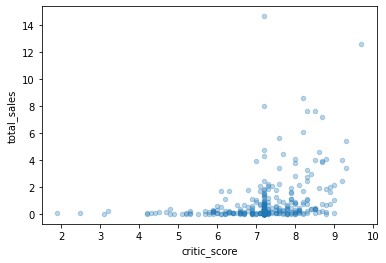

In [ ]:
popular_platform_data.plot(x="critic_score", y="total_sales", kind='scatter', alpha=0.3);

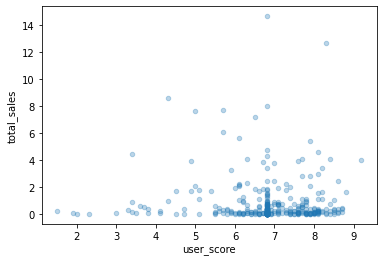

In [ ]:
popular_platform_data.plot(x="user_score", y="total_sales", kind='scatter', alpha=0.3);

In [ ]:
corrl_user = popular_platform_data["user_score"].corr(popular_platform_data["total_sales"])
corrl_critic = popular_platform_data["critic_score"].corr(popular_platform_data["total_sales"])
print("In games for ps4 the correlation between user score and total sales is {:.2}".format(corrl_user))
print("In games for ps4 the correlation between critic score and total sales is {:.2}".format(corrl_critic))

In games for ps4 the correlation between user score and total sales is -0.031
In games for ps4 the correlation between critic score and total sales is 0.33


we can see a stronger correlation between critic score and total sales then user score so we can asume people rely more on critic score to inform their purchase

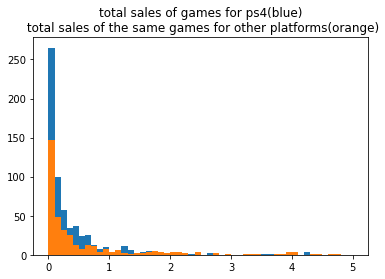

In [ ]:
ps4_games = popular_platform_data["name"].unique()
ps4_games_data = relevant_data.query("name in @ps4_games and platform != 'ps4'")
plt.hist(ps4_games_data["total_sales"], bins= 50, range=(0,5))
plt.hist(popular_platform_data["total_sales"], bins= 50, range=(0,5))
plt.title("total sales of games for ps4(blue)\n total sales of the same games for other platforms(orange)")
plt.show()

we can see that the same games are in average are sold more for ps4 than the other platforms

**conclusion:**

we can see that games sales are in decline since 2008

the most popular platformsun in the time span given by far are ps2, xbox30, ps3, wii, ds, ps.

it generally take for new platforms to appear and fade is 13 years

after looking at the data i didn't see any profitable platforms they are all in decline

we can see a stronger correlation between critic score and total sales then user score so we can asume people rely more on critic score to inform their purchase

we can see that the same games are in average are sold more for ps4 than the other platforms

# **Step 4: Creating a user profile for each region**

In [ ]:
region = ["na_sales", "eu_sales", "jp_sales"]

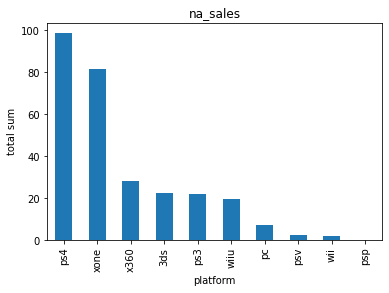

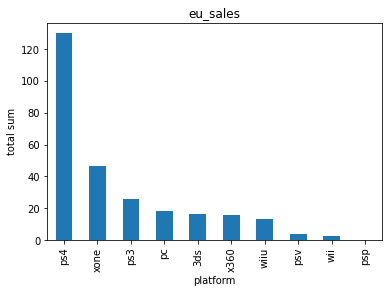

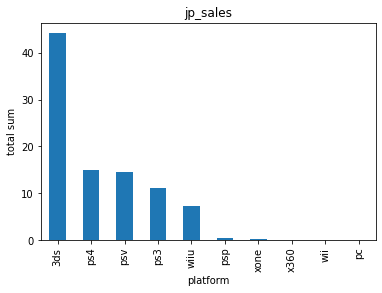

In [ ]:
for i in region:
    relevant_data.groupby("platform").sum()[i].sort_values(ascending=False).plot(y = i, kind = "bar")
    plt.title(i)
    plt.ylabel('total sum')
    plt.show()

in the NA region the poupolar platforms are ps4, xone, x360

in the EU region the poupolar platforms are ps4, xone, wii

in the JP region the poupolar platforms are 3ds, ps4, psv

we can see a strong defrence in the JP region in the platforms popularity

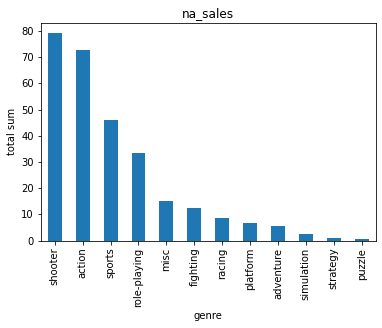

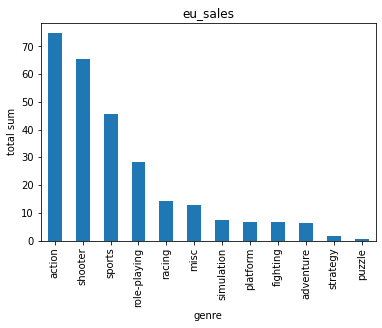

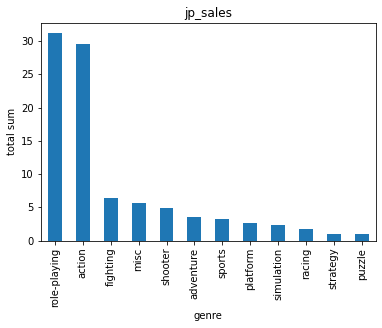

In [ ]:
for i in region:
    relevant_data.groupby("genre").sum()[i].sort_values(ascending=False).plot(y = i, kind = "bar")
    plt.title(i)
    plt.ylabel('total sum')
    plt.show()

in the NA region the poupolar game geners are shooter, action, sports

in the EU region the poupolar game geners are action, shooter, sports

in the JP region the poupolar game geners are role-playing, action, fighting

we can see a strong defrence in the JP region in the game gener popularity

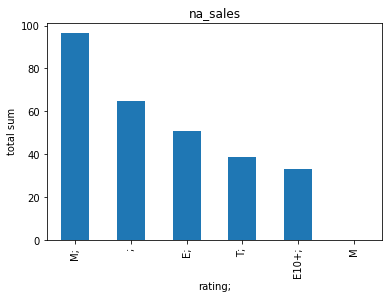

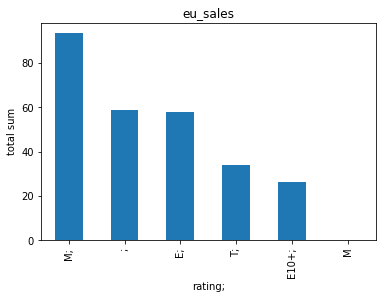

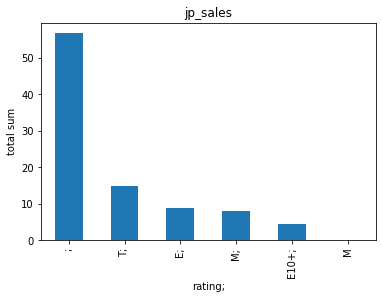

In [ ]:
try:
  for i in region:
      relevant_data.groupby("rating;").sum()[i].sort_values(ascending=False).plot(y = i, kind = "bar")
      plt.title(i)
      plt.ylabel('total sum')
      plt.show()
except:
  for i in region:
      relevant_data.groupby("rating").sum()[i].sort_values(ascending=False).plot(y = i, kind = "bar")
      plt.title(i)
      plt.ylabel('total sum')
      plt.show()

in the NA region and EU region the poupolar games by rating are M, E, T

in the JP region the poupolar games  by rating are T, E, M

we can see a strong defrence in the JP region in the game gener popularity

**conclusion:**

we can see that games marked in the JP region is very defrent the the NA and EU regions

the types platforms and  ganer of games sold are different

so any conclusion will be making about the regions should take that in acount

# **Step 5: Testing hypotheses**

In [ ]:
pc_platform_des = relevant_data.query("platform == 'pc' and critic_score > 0 and user_score > 0")
pc_platform_data = relevant_data.query("platform == 'pc'")
pc_platform_data["user_score"] = pc_platform_data["user_score"].replace(to_replace = 0, value=round(pc_platform_des["user_score"].mean(),1))
pc_platform_data["critic_score"] = pc_platform_data["critic_score"].replace(to_replace = 0, value=round(pc_platform_des["critic_score"].mean(),1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
x360_platform_des = relevant_data.query("platform == 'x360' and critic_score > 0 and user_score > 0")
x360_platform_data = relevant_data.query("platform == 'x360'")
x360_platform_data["user_score"] = x360_platform_data["user_score"].replace(to_replace = 0, value=round(x360_platform_des["user_score"].mean(),1))
x360_platform_data["critic_score"] = x360_platform_data["critic_score"].replace(to_replace = 0, value=round(x360_platform_des["critic_score"].mean(),1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Test the hypotheses that the average user ratings of the Xbox One and PC platforms are the same.

using the standard alpha 5% and the test Independent Sample T-Test. In this type of test, you are comparing the average of two independent unrelated groups. Meaning, you are comparing samples from two different populations and are testing whether or not they have a different average.

H0: the average user ratings of the Xbox One and PC platforms are the same

H1: the average user ratings of the Xbox One and PC platforms differs

we use the ttest_int because its a test of average of two independent unrelated groups the ratings of Xbox One and PC games

In [ ]:
alpha = 0.05
results = st.ttest_ind(x360_platform_data["user_score"], pc_platform_data["user_score"])
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis that the Average user ratings of the Xbox One and PC platforms are the same")
else:
    print("'We can't reject the null hypothesis that the Average user ratings of the Xbox One and PC platforms are the same")

p-value:  0.01927538384871892
We reject the null hypothesis that the Average user ratings of the Xbox One and PC platforms are the same


In [ ]:
action_game_data = relevant_data.query("genre == 'action'")
sports_game_data = relevant_data.query("genre == 'sports'")

Test the hypotheses that the average user ratings for the Action and Sports genres are different.

using the standard alpha 5% and the test Independent Sample T-Test. In this type of test, you are comparing the average of two independent unrelated groups. Meaning, you are comparing samples from two different populations and are testing whether or not they have a different average.

H0: the average user ratings for the Action and Sports genres are the same

H1: the average user ratings for the Action and Sports genres are different

we use the ttest_int because its a test of average of two independent unrelated groups the Action and Sports game genres

In [ ]:
alpha = 0.05
results = st.ttest_ind(action_game_data["user_score"], sports_game_data["user_score"])
print('p-value: ', results.pvalue)

if  results.pvalue < alpha:
    print("We reject the null hypothesis that the average user ratings for the Action and Sports genres are the same")
else:
    print("We can't reject the null hypothesis that the average user ratings for the Action and Sports genres the same")

p-value:  0.003649296098234564
We reject the null hypothesis that the average user ratings for the Action and Sports genres are the same


in the t-tsting we found out that 

We reject the null hypothesis that the Average user ratings of the Xbox One and PC platforms are the same

We reject the null hypothesis that the average user ratings for the Action and Sports genres are the same

meaning that the the user ratings are defreen between platforms and game ganers 

# **Step 6: general conclusion**

in this Project we have learned several things:

1. a platform rise and fall takes aboute 10 years

2. the gsales for games in the platforms : ps4, xone and pc are on the rise

3. the JP market is very defrent from the western in the consuls that are popular, ganres and rating of games that are solde there is advertising there should be defrent

4. in the west more games are sold for the platforms x360, wii, ps3 and in the ganer action, sports, shooter  and ratings are E, M, T, so games frome that grope should sale more then others in that region so you should advertise them more

5. while in JP more games are sold for the platforms 3ds, ps3, psv and in ganer role-playing, action, fighting with the ratings rated, T, E, M. so games from that grope should sale more then others in that regionso so you should advertise them more

6. we can see a stronger correlation between critic score and total sales then user score so we can asume people rely more on critic score to inform their purchase

7. the same games are sold more for the ps4 platform that the other platforms

8. the average user ratings of the Xbox One and PC platforms are diffrent and the average user ratings for the Action and Sports genres are diffrent

in conclusion we should invest in ps4 games, in the west in games in ganer role-playing, action, fihjting with the ratings rated, T, E, M and in the jp market in the games n ganer role-playing, action, fighting with the ratings rated, T, E, M. those are the games that will probbly sell the most in those regions 
